In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
plt.style.use('seaborn')
data=pd.read_excel("Data.xlsx",header=None)
#Reading data from excel file

In [3]:
data=data[1:]
data=data.rename(columns={0:"Month",1:"Price"})
#Renaming the column names

In [4]:
data.head()

,Month,Price
1,140,68.61
2,139,69.08
3,138,65.81
4,137,64.07
5,136,59.8


In [5]:
mean=data['Price'].mean()
mean

53.93498220640573

In [6]:
data['Price'].std()

31.71711000756256

In [7]:
data['Price'].max()

125.28

In [8]:
data['Price'].min()

9

In [9]:
n=data['Price'].count()

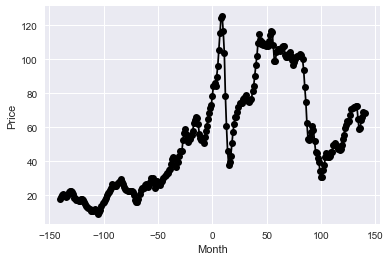

In [10]:
plt.plot(data['Month'], data['Price'], '-ok', color='black');
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()
#Plotting Price vs Month to analyze the data given
#The month are taken from 

In [13]:
X=pd.DataFrame(data['Month'])
Y=data['Price']
reg = LinearRegression() 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
c=reg.intercept_

In [16]:
c

54.282808678595565

In [17]:
m=reg.coef_[0]

In [18]:
m

0.26251783322070293

In [19]:
#Predictions for next 10 months
for i in range (1,11):
    y=m*(i+140)+c
    print(i+140,y)
    print("\n")

141 91.29782316271468


142 91.56034099593538


143 91.82285882915608


144 92.08537666237679


145 92.34789449559749


146 92.6104123288182


147 92.8729301620389


148 93.1354479952596


149 93.3979658284803


150 93.66048366170101




In [30]:
#Predicted y values using linear regression model
y_pred=c+m*X_test
y_pred_all=c+m*X

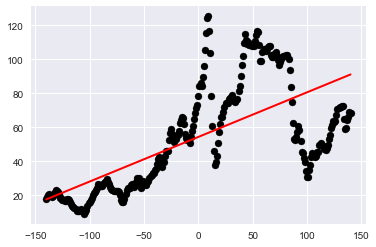

In [31]:
plt.scatter(X, Y,  color='black')
plt.plot(X, y_pred_all, color='red', linewidth=2)
plt.show()

In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 19.585791846086558
Mean Squared Error: 610.0180811692125
Root Mean Squared Error: 24.698544110315744


In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.4134582838751313

F Test for significance


In [35]:
SSR=0
SSE=0
s=y_pred_all.iloc[:,0]
for i in range(0,n):
    SSR=SSR+(s.iloc[i]-mean)**2
    SSE=SSE+(Y.iloc[i]-s.iloc[i])**2

In [36]:
SSR

127457.58597352404

In [37]:
SSE

157917.1044976157

In [38]:
MSR=SSR
MSE=SSE/(n-2)

In [39]:
F=MSR/MSE
F
#F alpha at 0.05 los, 1 numerator dof and 279 denominator dof is 3.875 

225.18565420600217

Hence m is significant